# Blackjack Output Visualizations

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

The Blackjack simulator is a command line application. It allows one to specify the type of game to play, and how my games to run the simulation on. When complete, it writes the results to a CSV file called `{GameType}.csv`.

In [2]:
!python blackjack.py --help

usage: blackjack.py [-h] [--games GAMES_TO_PLAY]
                    [--game-type {FixedPolicyGame,QLearningPolicyGame,OptimizedPolicyGame}]

Plays games of Blackjack

options:
  -h, --help            show this help message and exit
  --games GAMES_TO_PLAY
                        The number of games to play. Default 1000.
  --game-type {FixedPolicyGame,QLearningPolicyGame,OptimizedPolicyGame}
                        The type of game to play. Default: FixedPolicyGame


## Fixed Policy Game

My initial fixed policy has the player hitting until they could bust (e.g. hit under 12).

In [3]:
!python blackjack.py --game-type FixedPolicyGame --games 1000

Playing 1000 games of type FixedPolicyGame...

Results after 1000 games of type FixedPolicyGame:
	Dealer won: 702
	Player won: 298


In [4]:
fixed_game_df = pd.read_csv('FixedPolicyGame.csv')
fixed_game_df.head()

,winner,dealer_score,player_score
0,Winner.Dealer,21,14
1,Winner.Player,14,20
2,Winner.Dealer,18,14
3,Winner.Dealer,21,15
4,Winner.Dealer,20,12


Text(0.5, 1.0, 'Winner Counts of Initial Fixed Game')

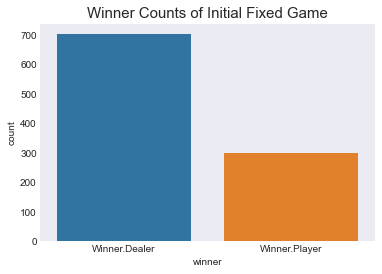

In [5]:
sns.countplot(x=fixed_game_df['winner'], order=fixed_game_df['winner'].value_counts().index)
plt.title('Winner Counts of Initial Fixed Game', fontsize=15)

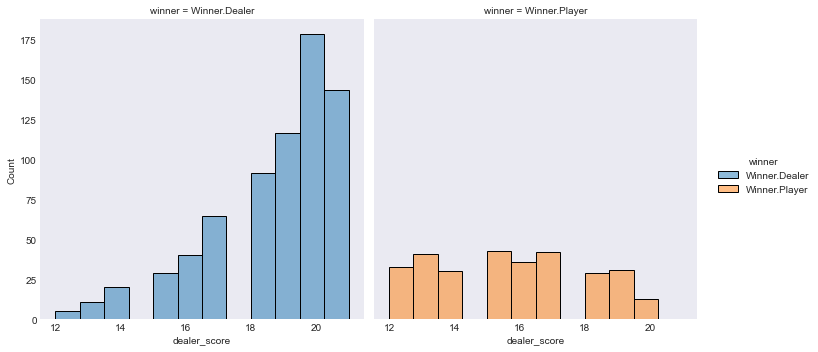

In [6]:
sns.displot(data=fixed_game_df, x='dealer_score', col='winner', hue='winner', col_order=fixed_game_df['winner'].value_counts().index)

Observations:
* The dealer won more often with scores closer to 21.
* The dealer lost most often with a score around 16 and the loss rate trailed off in both directions. This can be explained by the higher win percentage as the score got higher and a greater chance of hitting on lower scores.

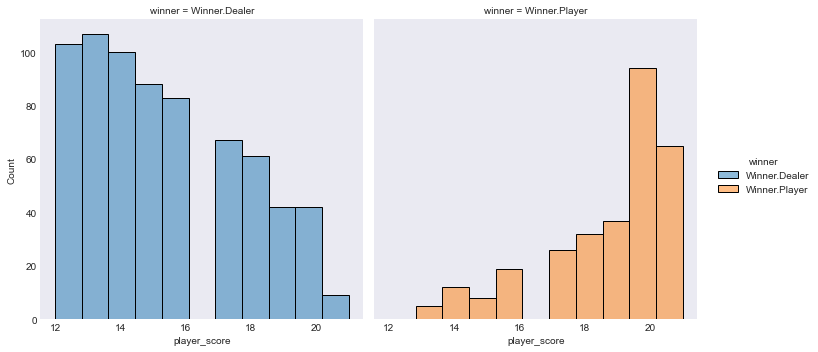

In [7]:
sns.displot(data=fixed_game_df, x='player_score', col='winner', hue='winner')

Observations:
* The player won more often when their score approached 21.
* The player lost most often when staying on 14 as the fixed policy dictated.

## Q-Lerarning Policy Game

In [8]:
!python blackjack.py --game-type QLearningPolicyGame --games 1000

Playing 1000 games of type QLearningPolicyGame...

Results after 1000 games of type QLearningPolicyGame:
	Dealer won: 674
	Player won: 326
state: 2 - best action: Action.STAND
state: 3 - best action: Action.STAND
state: 4 - best action: Action.HIT
state: 5 - best action: Action.HIT
state: 6 - best action: Action.HIT
state: 7 - best action: Action.HIT
state: 8 - best action: Action.HIT
state: 9 - best action: Action.HIT
state: 10 - best action: Action.HIT
state: 11 - best action: Action.HIT
state: 12 - best action: Action.HIT
state: 13 - best action: Action.HIT
state: 14 - best action: Action.HIT
state: 15 - best action: Action.HIT
state: 16 - best action: Action.HIT
state: 17 - best action: Action.STAND
state: 18 - best action: Action.STAND
state: 19 - best action: Action.STAND
state: 20 - best action: Action.STAND
state: 21 - best action: Action.STAND


The q-learning algorithm determined it was best to hit until 17 (given the dealer rules). Next, I implement an optimized policy based on this and observe the results after another 1000 games.

## Optimized Policy Game

In [9]:
!python blackjack.py --game-type OptimizedPolicyGame --games 1000

Playing 1000 games of type OptimizedPolicyGame...

Results after 1000 games of type OptimizedPolicyGame:
	Dealer won: 655
	Player won: 345


In [7]:
optimized_game_df = pd.read_csv('OptimizedPolicyGame.csv')
optimized_game_df.head()

,winner,dealer_score,player_score
0,Winner.Player,20,21
1,Winner.Dealer,19,17
2,Winner.Dealer,14,24
3,Winner.Player,18,20
4,Winner.Dealer,19,19


Text(0.5, 1.0, 'Winner Counts of Optimized Game')

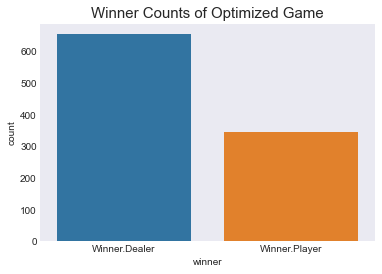

In [11]:
sns.countplot(x=optimized_game_df['winner'], order=optimized_game_df['winner'].value_counts().index)
plt.title('Winner Counts of Optimized Game', fontsize=15)

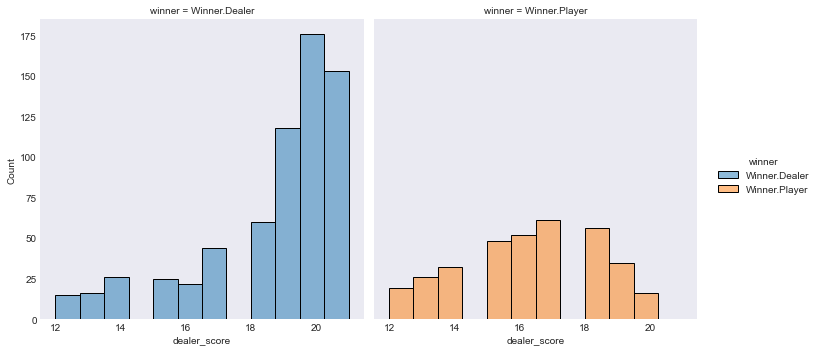

In [9]:
order = optimized_game_df['winner'].value_counts().index
sns.displot(data=optimized_game_df, x='dealer_score', col='winner', hue='winner', col_order=order, hue_order=order)

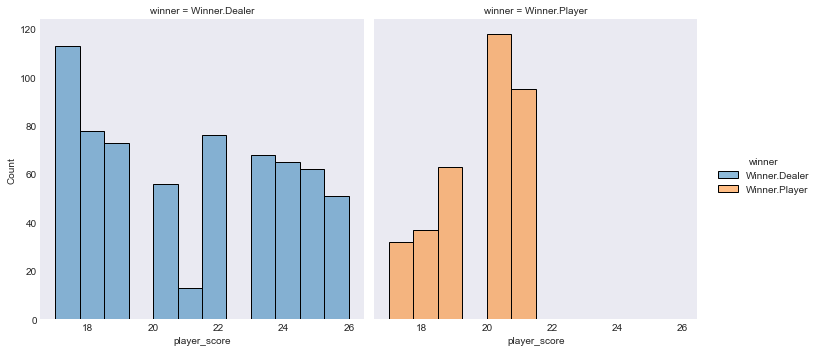

In [10]:
sns.displot(data=optimized_game_df, x='player_score', col='winner', hue='winner', col_order=order, hue_order=order)